# - **Joinig Data With Pandas**

# _Chapter. 1 Data Merging Basics_

## Inner Join

inner join will always return rows that have matching values in both tables or DataFrames


In [2]:
import pandas as pd
import numpy as np

taxi_owners = pd.read_pickle("datasets/taxi_owners.p")
taxi_veh = pd.read_pickle("datasets/taxi_vehicles.p")
taxi_owners.head(5)

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [3]:
taxi_veh.head(5)

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


 We will figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, first we'll merge the taxi_owners and taxi_veh tables together on the vid column

In [4]:
# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on="vid",suffixes=("_own","_veh"))

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


In [5]:
taxi_own_veh.head(5)

,rid,vid,owner_own,address,zip,make,model,year,fuel_type,owner_veh
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


In [6]:
# Print the value_counts to find the most popular fuel_type
pop_fuel_type = taxi_own_veh["fuel_type"].value_counts().sort_values(ascending=False).head(1)
pop_fuel_type

HYBRID    2792
Name: fuel_type, dtype: int64

## One-to-One and One-to-many relationships
### one-to-one: each row in a table is related to only one row in       other table:
### one-to-many: row in a left table can relate to one or many rows     in right table

In [7]:
biz_owners =  pd.read_pickle("datasets/business_owners.p")
licenses =  pd.read_pickle("datasets/licenses.p")
biz_owners.head(3)

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER


In [8]:
licenses.head(3)

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632


In [9]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on = "account")

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby("title").agg({'account':'count'})

# Sort the counted_df in descending order
sorted_df = counted_df.sort_values(by = "account" ,ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


In [10]:
licenses_owners.head(5)

,account,ward,aid,business,address,zip,first_name,last_name,title
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616,ROBERT,GLICK,MEMBER
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,PRESIDENT
2,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,SECRETARY
3,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,WALTER,MROZEK,PARTNER
4,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,CELINA,BYRDAK,PARTNER


## Joinig multiple tables

Our goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7)

In [11]:
cal = pd.read_pickle("datasets/cta_calendar.p")
ridership = pd.read_pickle("datasets/cta_ridership.p")
stations = pd.read_pickle("datasets/stations.p")

cal.head(2)

,year,month,day,day_type
0,2019,1,1,Sunday/Holiday
1,2019,1,2,Weekday


In [12]:
ridership.head(2)

,station_id,year,month,day,rides
0,40010,2019,1,1,576
1,40010,2019,1,2,1457


In [13]:
stations.head(2)

,station_id,station_name,location
0,40010,Austin-Forest Park,"(41.870851, -87.776812)"
1,40020,Harlem-Lake,"(41.886848, -87.803176)"


In [14]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal)

In [15]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')
ridership_cal_stations.head(5)

,station_id,year,month,day,rides,day_type,station_name,location
0,40010,2019,1,1,576,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"
1,40010,2019,1,2,1457,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
2,40010,2019,1,3,1543,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
3,40010,2019,1,4,1621,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
4,40010,2019,1,5,719,Saturday,Austin-Forest Park,"(41.870851, -87.776812)"


In [16]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations["station_name"]=="Wilson")& (ridership_cal_stations["day_type"]=="Weekday") & (ridership_cal_stations["month"]==7) )
# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


we can see above that Wilson station has 140005 rides in july during Weekdays

In [17]:
zip_demo = pd.read_pickle("datasets/zip_demo.p")
wards = pd.read_pickle("datasets/ward.p")

In [18]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on = "zip") \
            			.merge(wards, on = "ward")



In [19]:
licenses_zip_ward.head(3)

,account,ward,aid,business,address_x,zip_x,income,alderman,address_y,zip_y
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
1,11280,3,763,PRIME WAY,2251 S STATE ST 1ST,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
2,15015,3,NaN,"SOUTHVIEW MANOR, INC.",3311 S MICHIGAN AVE,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609


In [20]:
# Print the results by alderman and show median income
print(licenses_zip_ward.groupby("alderman").agg({'income':'median'}))

                             income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly             110215.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins, Jr.     33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
Leslie A. Hairston          

assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The land_use table has info on the percentage of vacant land by city ward. The census table has population by ward, and the licenses table lists businesses by ward.

In [21]:
land_use = pd.read_pickle("datasets/land_use.p")
census = pd.read_pickle("datasets/census.p")

In [22]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on="ward") \
                       .merge(licenses, on="ward", suffixes=("_cen", "_lic"))
land_cen_lic.head(5)

,ward,residential,commercial,industrial,vacant,other,pop_2000,pop_2010,change,address_cen,zip_cen,account,aid,business,address_lic,zip_lic
0,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


In [23]:
# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(by = ["vacant",'account','pop_2010'], ascending=[False,True,True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156


we can see that ward 7 is best place for goat moew business

# Chapter 2: Merging Tables With Different Join Types

## Left join

A left join returns all rows of data from the left table and only those rows from the right table where key columns match.

In [24]:
financials = pd.read_pickle("datasets/financials.p")
movies = pd.read_pickle("datasets/movies.p")

In [25]:
financials.head(2)


,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08


In [26]:
movies.head(2)

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12


In [27]:
movies[movies["title"]=="Toy Story"]

,id,title,popularity,release_date
3716,862,Toy Story,73.640445,1995-10-30


In [28]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()
# Print the number of movies missing financials
print(number_of_missing_fin)

1574


In this exercise, we will start off with a sample of movie data from the movie series Toy Story. our goal is to enrich this data by adding the marketing tag line for each movie. we will compare the results of a left join versus an inner join.

In [29]:
taglines= pd.read_pickle("datasets/taglines.p")
# Create the DataFrame for toy story
data = {
    "id": [10193, 863, 862],
    "title": ["Toy Story 3", "Toy Story 2", "Toy Story"],
    "popularity": [59.995, 73.575, 73.640],
    "release_date": ["2010-06-16", "1999-10-30", "1995-10-30"]
}
toy_story= pd.DataFrame(data)



In [30]:
toy_story

,id,title,popularity,release_date
0,10193,Toy Story 3,59.995,2010-06-16
1,863,Toy Story 2,73.575,1999-10-30
2,862,Toy Story,73.640,1995-10-30


In [31]:
taglines.head(3)

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes


- first we will join using left join

In [32]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on ='id', how= 'left')

# Print the rows and shape of toystory_tag
toystory_tag


,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575,1999-10-30,The toys are back!
2,862,Toy Story,73.640,1995-10-30,NaN


In [33]:
toystory_tag.shape

(3, 5)

- Now using inner join

In [34]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on = 'id')

# Print the rows and shape of toystory_tag
toystory_tag


,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575,1999-10-30,The toys are back!


In [35]:
toystory_tag.shape

(2, 5)

from above we can see that: 
- left join return all the rows of left table also with null values while inner join only return the rows from left table that macthes with the rigt table
- If your goal is to enhance or enrich a dataset, then you do not want to lose any of your original data. A left join will do that by returning all of the rows of your left table, while using an inner join may result in lost data if it does not exist in both tables.
-  If those rows in the left table match multiple rows in the right table, then all of those rows will be returned. 

## Right Join

It will return all of the rows from the right table and includes only those rows from the left table that have matching values. It is the mirror opposite of the left join.

In [8]:
movies_to_genres = pd.read_pickle("datasets/movie_to_genres.p")
scifi_movies = movies_to_genres[movies_to_genres["genre"]=="Science Fiction"]
action_movies = movies_to_genres[movies_to_genres["genre"]=="Action"]

In [37]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]
scifi_only.head()

,movie_id,genre_act,genre_sci
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
5,68,NaN,Science Fiction
6,74,NaN,Science Fiction


In [38]:

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on='id',right_on='movie_id')

# Print the first few rows and shape of movies_and_scifi_only
movies_and_scifi_only.head()


,id,title,popularity,release_date,movie_id,genre_act,genre_sci
0,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,18841,NaN,Science Fiction
1,26672,The Thief and the Cobbler,2.439184,1993-09-23,26672,NaN,Science Fiction
2,15301,Twilight Zone: The Movie,12.902975,1983-06-24,15301,NaN,Science Fiction
3,8452,The 6th Day,18.447479,2000-11-17,8452,NaN,Science Fiction
4,1649,Bill & Ted's Bogus Journey,11.349664,1991-07-19,1649,NaN,Science Fiction


In [39]:
movies_and_scifi_only.shape

(258, 7)

What are the genres of the most popular movies?

In [40]:
pop_movies = movies.sort_values(by='popularity',ascending=False).head(10)
pop_movies

,id,title,popularity,release_date
4546,211672,Minions,875.581305,2015-06-17
4343,157336,Interstellar,724.247784,2014-11-05
1966,293660,Deadpool,514.569956,2016-02-09
2423,118340,Guardians of the Galaxy,481.098624,2014-07-30
4220,76341,Mad Max: Fury Road,434.278564,2015-05-13
1867,135397,Jurassic World,418.708552,2015-06-09
4375,22,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
1106,119450,Dawn of the Planet of the Apes,243.791743,2014-06-26
4216,131631,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
2614,177572,Big Hero 6,203.734590,2014-10-24


In [41]:
movies_to_genres.head(5)

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


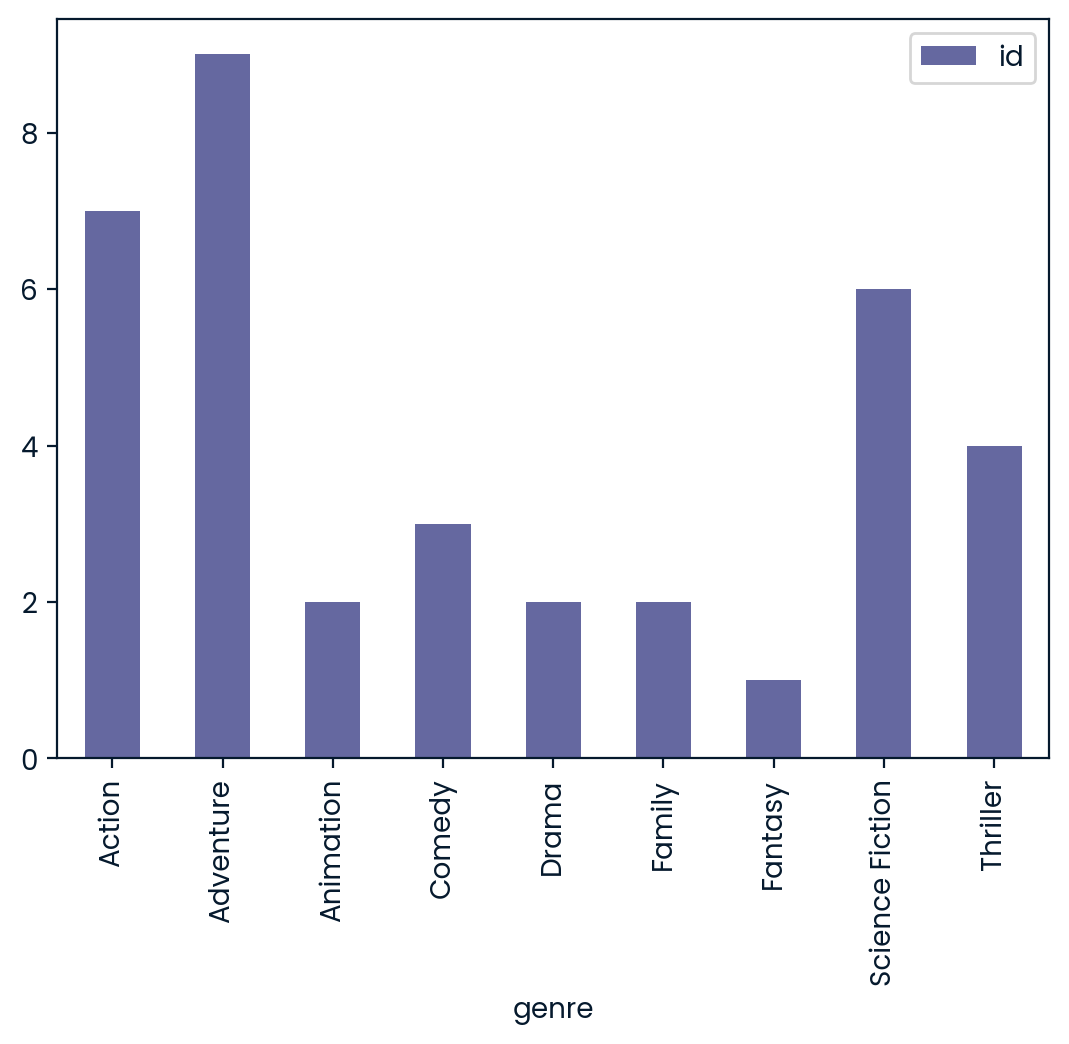

In [42]:

import matplotlib.pyplot as plt

# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movies_to_genres.merge(pop_movies, how='right', left_on='movie_id', right_on='id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id': 'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

from graph we can see that Action & Adventure movies are most popular

## Outer Join

it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table.

## merging a table to itself

you might need to merge a table to itself when working with tables that have a 
- hierarchical relationship, like employee and manager.
- sequential relationships such as logistic movements. 
- Graph data, such as networks of friends, might also require this     technique.

In [43]:
crews = pd.read_pickle('datasets/crews.p')
crews.head(5)

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


In [44]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
direct_crews.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays


By merging the table to itself, you compared the value of the __director__ from the jobs column to other values from the jobs column. With the output, you can quickly see different movie directors and the people they worked with in the same movie.

## merging on indexes

In [45]:
ratings = pd.read_pickle('datasets/ratings.p')

In [46]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on='id',how='left')

# Print the first few rows of movies_ratings
movies_ratings.head()

,id,title,popularity,release_date,vote_average,vote_count
0,257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
2,38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
3,9672,Infamous,3.680896,2006-11-16,6.4,60.0
4,12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0


It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the sequels and financials tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

In [47]:
sequels = pd.read_pickle('datasets/sequels.p')

In [48]:
sequels.head(2)

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863


In [49]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id',
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
titles_diff.sort_values(by='diff',ascending=False).head()

,title_org,title_seq,diff
28,Jurassic Park III,Jurassic World,1.144748e+09
26,Batman Begins,The Dark Knight,6.303398e+08
11,Iron Man 2,Iron Man 3,5.915067e+08
1,Toy Story 2,Toy Story 3,5.696028e+08
14,Quantum of Solace,Skyfall,5.224703e+08


we found out that Jurassic World had one of the highest of all, improvement in revenue compared to the original movie.

# Chapter 3: Advanced Merging and Concatenating

## Filtering Join

filtering joins filter observations from one table based on whether or not they match an observation in another table.
1.  **semi join**
- A semi join filters the left table down to those observations that have a match in the right table. It is similar to an inner join where only the intersection between the tables is returned, but unlike an inner join, only the columns from the left table are shown.
- It first merges the tables, then searches it for which rows belong in the final result creating a filter and subsets the left table with that filter.
2. **anti join**
-  An anti join returns the observations in the left table that do not have a matching observation in the right table. It also only returns the columns from the left table.

## Concatenate DataFrames together vertically

- ## verifying integrity

In [10]:
import pandas as pd

# Sample data for taxi_owners
data_taxi_owners = {
    'rid': ['1', '2', '3'],
    'vid': ['A1', 'A2', 'A3'],
    'owner': ['John Doe', 'Jane Smith', 'Emily Davis'],
    'address': ['123 Elm St', '456 Oak St', '789 Pine St'],
    'zip': ['10001', '10002', '10003']
}

# Sample data for taxi_veh
data_taxi_veh = {
    'vid': ['A1', 'A2', 'A4'],
    'make': ['Toyota', 'Honda', 'Ford'],
    'model': ['Prius', 'Civic', 'Focus'],
    'year': [2015, 2016, 2017],
    'fuel_type': ['Hybrid', 'Gasoline', 'Gasoline'],
    'owner': ['John Doe', 'Jane Smith', 'Michael Brown']
}

# Creating DataFrames
taxi_owners = pd.DataFrame(data_taxi_owners)
taxi_veh = pd.DataFrame(data_taxi_veh)

# Concatenating DataFrames vertically
concatenated_df = pd.concat([taxi_owners, taxi_veh], ignore_index=True)
concatenated_df

,rid,vid,owner,address,zip,make,model,year,fuel_type
0,1,A1,John Doe,123 Elm St,10001,NaN,NaN,NaN,NaN
1,2,A2,Jane Smith,456 Oak St,10002,NaN,NaN,NaN,NaN
2,3,A3,Emily Davis,789 Pine St,10003,NaN,NaN,NaN,NaN
3,NaN,A1,John Doe,NaN,NaN,Toyota,Prius,2015.0,Hybrid
4,NaN,A2,Jane Smith,NaN,NaN,Honda,Civic,2016.0,Gasoline
5,NaN,A4,Michael Brown,NaN,NaN,Ford,Focus,2017.0,Gasoline


# Chapter 4: Merging Ordered and Time-Series Data

## Using merge_ordered()

- The results are similar to the standard merge method with an outer join, but here that the results are sorted. The sorted results make this a useful method for ordered or time-series data.

### Forward fill

-  fill in this missing data using a technique called forward filling. It will interpolate missing data by filling the missing values with the previous value

In [6]:
# Create the DataFrame using the provided data
gdp_data = {
    "country code": ["USA", "USA", "USA", "USA", "USA", "USA", "USA", "USA", "USA", "USA"],
    "year": [2010, 2011, 2012, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
    "gdp": [1.499e+13, 1.554e+13, 1.620e+13, 1.620e+13, 1.678e+13, 1.752e+13, 1.822e+13, 1.871e+13, 1.949e+13, 2.049e+13]
}

gdp = pd.DataFrame(gdp_data)

sp500 = pd.read_csv('datasets/S&P500.csv')

In [11]:
sp500.head(3)

,Date,Returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78


In [14]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp,sp500,left_on='year', right_on='Date', how='left')

# Print gdp_sp500
gdp_sp500

,country code,year,gdp,Date,Returns
0,USA,2010,1.499000e+13,2010.0,12.78
1,USA,2011,1.554000e+13,2011.0,0.00
2,USA,2012,1.620000e+13,2012.0,13.41
3,USA,2012,1.620000e+13,2012.0,13.41
4,USA,2013,1.678000e+13,2013.0,29.60
5,USA,2014,1.752000e+13,2014.0,11.39
6,USA,2015,1.822000e+13,2015.0,-0.73
7,USA,2016,1.871000e+13,2016.0,9.54
8,USA,2017,1.949000e+13,2017.0,19.42
9,USA,2018,2.049000e+13,NaN,NaN


In [19]:
# Use merge_ordered() to merge gdp and sp500, and forward fill missing values
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='Date', how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp','Returns']]

# Print gdp_returns correlation
gdp_returns.corr()

,gdp,Returns
gdp,1.000000,0.211734
Returns,0.211734,1.000000


## selecting data using .query() likr SQL

In [3]:
gdp= pd.read_csv('datasets/WorldBank_GDP.csv')
pop = pd.read_csv('datasets/WorldBank_POP.csv')

In [9]:
gdp.head(1)

,Country Name,Country Code,Indicator Name,Year,GDP
0,China,CHN,GDP (current US$),2010,6.087160e+12


In [10]:
pop.head(1)

,Country Name,Country Code,Indicator Name,Year,Pop
0,Aruba,ABW,"Population, total",2010,101669.0


In [14]:
# Example 1: Query to filter rows where GDP is greater than 1 trillion
high_gdp = gdp.query('GDP > 1e12')
high_gdp

# Example 2: Query to filter rows where the year is after 2010
recent_years = gdp.query('Year > 2010')
recent_years

# Example 3: Query to filter rows where the country name is 'United States'
us_data = gdp.query('`Country Name` == "United States"')
us_data

,Country Name,Country Code,Indicator Name,Year,GDP
3,United States,USA,GDP (current US$),2010,1.499210e+13
7,United States,USA,GDP (current US$),2011,1.554260e+13
11,United States,USA,GDP (current US$),2012,1.619700e+13
15,United States,USA,GDP (current US$),2012,1.619700e+13
19,United States,USA,GDP (current US$),2013,1.678480e+13
23,United States,USA,GDP (current US$),2014,1.752170e+13
27,United States,USA,GDP (current US$),2015,1.821930e+13
31,United States,USA,GDP (current US$),2016,1.870720e+13
35,United States,USA,GDP (current US$),2017,1.948540e+13
39,United States,USA,GDP (current US$),2018,2.049410e+13


In [18]:
recent_years.head(5)

,Country Name,Country Code,Indicator Name,Year,GDP
4,China,CHN,GDP (current US$),2011,7.551500e+12
5,Germany,DEU,GDP (current US$),2011,3.757700e+12
6,Japan,JPN,GDP (current US$),2011,6.157460e+12
7,United States,USA,GDP (current US$),2011,1.554260e+13
8,China,CHN,GDP (current US$),2012,8.532230e+12


In [17]:
us_data.head(5)

,Country Name,Country Code,Indicator Name,Year,GDP
3,United States,USA,GDP (current US$),2010,1.499210e+13
7,United States,USA,GDP (current US$),2011,1.554260e+13
11,United States,USA,GDP (current US$),2012,1.619700e+13
15,United States,USA,GDP (current US$),2012,1.619700e+13
19,United States,USA,GDP (current US$),2013,1.678480e+13


## .melt() method
- he melt method will allow us to unpivot, or change the format of, our dataset

In [19]:
# Create the dataframe
data = {
    "country": ["Brazil", "Canada", "France", "India"],
    "indicator": ["Inflation %", "Inflation %", "Inflation %", "Inflation %"],
    "2017": [3.45, 1.60, 1.03, 2.49],
    "2018": [3.66, 2.27, 1.85, 4.86],
    "2019": [3.73, 1.95, 1.11, 7.66]
}

inflation = pd.DataFrame(data)
inflation

,country,indicator,2017,2018,2019
0,Brazil,Inflation %,3.45,3.66,3.73
1,Canada,Inflation %,1.60,2.27,1.95
2,France,Inflation %,1.03,1.85,1.11
3,India,Inflation %,2.49,4.86,7.66


In [20]:
inflation.melt(id_vars=['country','indicator'], var_name='year', value_name='annual')

,country,indicator,year,annual
0,Brazil,Inflation %,2017,3.45
1,Canada,Inflation %,2017,1.60
2,France,Inflation %,2017,1.03
3,India,Inflation %,2017,2.49
4,Brazil,Inflation %,2018,3.66
5,Canada,Inflation %,2018,2.27
6,France,Inflation %,2018,1.85
7,India,Inflation %,2018,4.86
8,Brazil,Inflation %,2019,3.73
9,Canada,Inflation %,2019,1.95
